<a href="https://colab.research.google.com/github/abosedealli/Stockprediction/blob/main/AAPL%20Long%20Term%20data%20AR%20(TSA)%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Time Series AR Model

In [57]:
!pip install yfinance
!pip  install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [46]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.model_selection import train_test_split
ticker = "AAPL"
a_df = yf.download(ticker)['Adj Close']
a_df = pd.DataFrame(a_df)

[*********************100%***********************]  1 of 1 completed


In [67]:
a_df = a_df.asfreq('d') # Alterating the frequency to day
a_df.index # Checking the frequency
a_df = a_df.fillna(method='ffill') # Fill missing values

# Delete unnamed column
a_df.drop(a_df.columns[a_df.columns.str.contains('unnamed',case = False)],
          axis = 1, inplace = True)

In [62]:
# Create our model using whole data set
#model = AutoReg(a_df['Adj Close'], lags.ar_lags)
#model_fit = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [68]:
train_df = a_df.sample(frac=0.8, random_state=25)
test_df = a_df.drop(train_df.index)

In [69]:
train_model = AutoReg(a_df['Adj Close'], 2500).fit(cov_type="HC0")

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [71]:
# Define start and end for prediction 
start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start, end=end+100, dynamic=True)


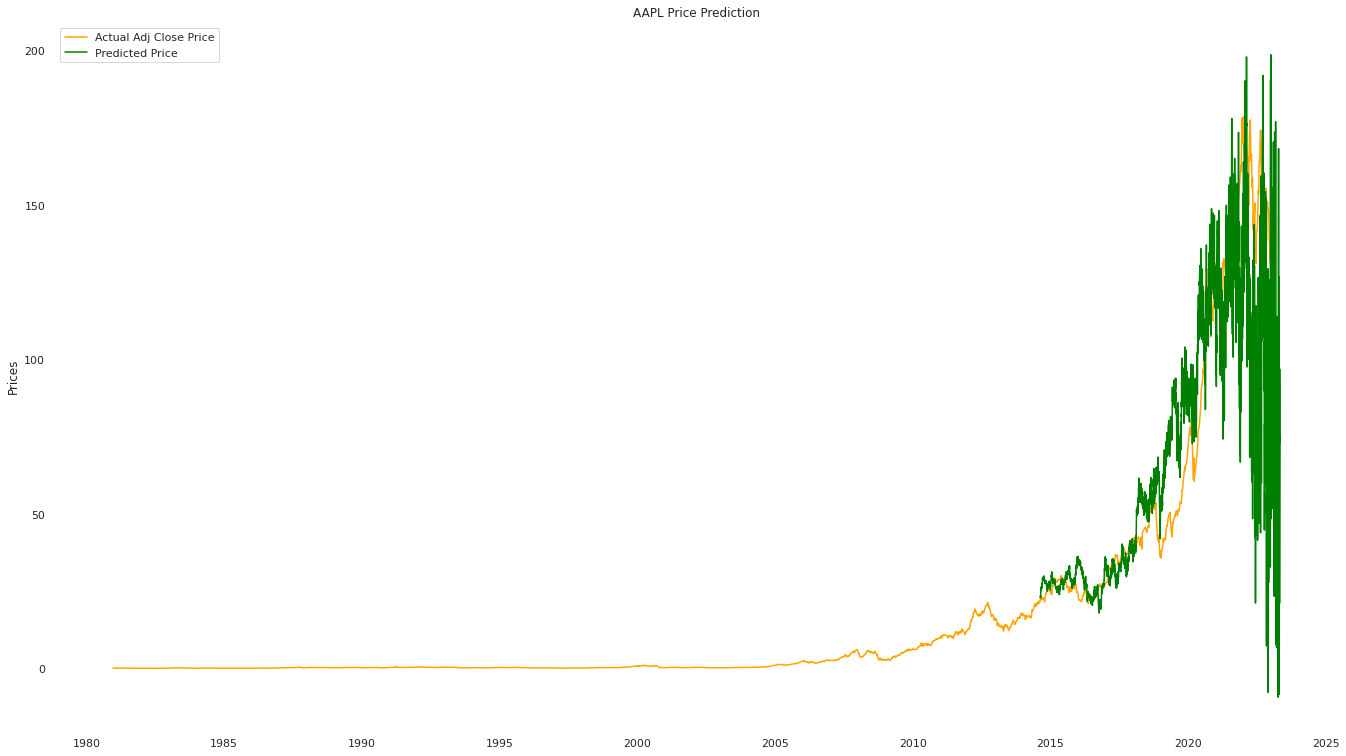

In [72]:
# Plot testing data with prediction
plt.plot(test_df['Adj Close'], 'orange', label='Actual Adj Close Price')
plt.plot(prediction, 'green', label='Predicted Price')
plt.title(f'{ticker} Price Prediction')
plt.ylabel("Prices")
plt.legend()
plt.show()

In [73]:
#  RMSE and MAPE  we will Calculate the RMSE and MAPE values
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mae= np.mean(np.abs(prediction - test_df['Adj Close']))

# Calculate RMSE and MAPE
rmse = np.sqrt(np.mean((prediction - test_df['Adj Close'])**2))
mape = np.mean(np.abs(prediction - test_df['Adj Close']) / test_df['Adj Close'])
mse=(np.sqrt(np.mean((prediction - test_df['Adj Close'])**2)))**2


print("RMSE:", rmse)
print("MAPE:", mape)
print("MsE", mse)
print("MAE:", mae)



RMSE: 27.782871570780884
MAPE: 0.23117734055875142
MsE 771.8879527185046
MAE: 17.7870115195241


# New Section
Calculating High Prices

In [36]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.model_selection import train_test_split
ticker = "AAPL"
a_df = yf.download(ticker)['High']
a_df = pd.DataFrame(a_df)

a_df = a_df.asfreq('d') # Change frequency to day
a_df.index # Check frequency
a_df = a_df.fillna(method='ffill') # Fill missing values
# Delete unnamed column
a_df.drop(a_df.columns[a_df.columns.str.contains('unnamed',case = False)],
         axis = 1, inplace = True)
a_df
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'axes.grid' : False})
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure',figsize=(23, 13))

[*********************100%***********************]  1 of 1 completed


In [37]:
train_df = a_df.sample(frac=0.8, random_state=25)
test_df = a_df.drop(train_df.index)

In [38]:
train_model = AutoReg(a_df['High'], 2500).fit(cov_type="HC0")

# Define start and end for prediction 
start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start, end=end+100, dynamic=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


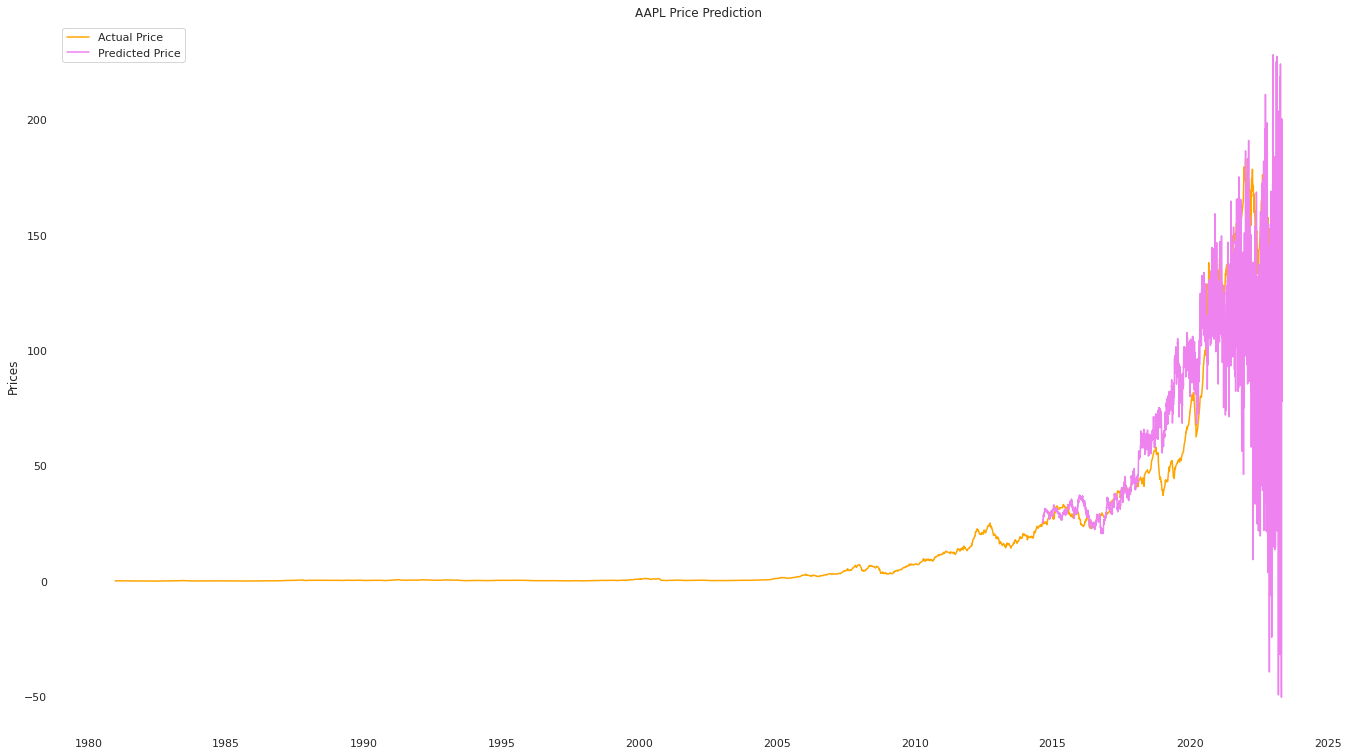

RMSE: 32.334645472035504
MAPE: 0.24815026690336908
MsE 1045.5292978022262
MAE: 20.278998931647568


In [39]:
# Plot testing data with prediction
plt.plot(test_df['High'], 'orange', label='Actual Price')
plt.plot(prediction, 'violet', label='Predicted Price')
plt.title(f'{ticker} Price Prediction')
plt.ylabel("Prices")
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mae= np.mean(np.abs(prediction - test_df['High']))

# Calculate RMSE and MAPE
rmse = np.sqrt(np.mean((prediction - test_df['High'])**2))
mape = np.mean(np.abs(prediction - test_df['High']) / test_df['High'])
mse=(np.sqrt(np.mean((prediction - test_df['High'])**2)))**2


print("RMSE:", rmse)
print("MAPE:", mape)
print("MsE", mse)
print("MAE:", mae)



# New Section
Price for Open was also calculated

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


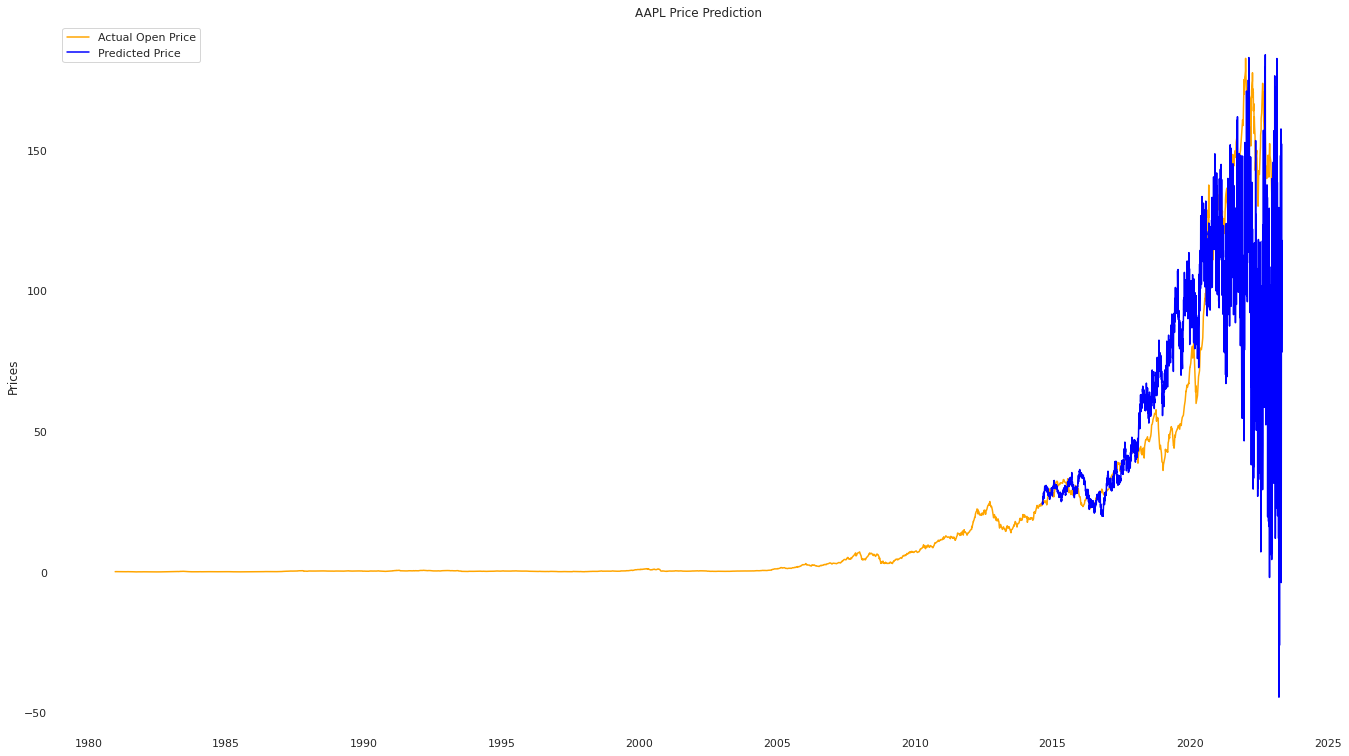

RMSE: 35.18762309603198
MAPE: 0.266660289067664
MsE 1238.1688191484031
MAE: 22.153524995633262


In [34]:


from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.model_selection import train_test_split

ticker = "AAPL"
a_df = yf.download(ticker)['Open']
a_df = pd.DataFrame(a_df)

a_df = a_df.asfreq('d') # Change frequency to day
a_df.index # Check frequency
a_df = a_df.fillna(method='ffill') # Fill missing values

# Delete unnamed column
a_df.drop(a_df.columns[a_df.columns.str.contains('unnamed',case = False)],
          axis = 1, inplace = True)


a_df

# Set style for seaborn plot

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'axes.grid' : False})
# Add automatic datetime converters
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(23, 13))

fig, ax = plt.subplots()

lags = ar_select_order(a_df, maxlag=30)

# Create our model using whole data set
model = AutoReg(a_df['Open'], lags.ar_lags)
model_fit = model.fit()



train_df = a_df.sample(frac=0.8, random_state=25)
test_df = a_df.drop(train_df.index)



train_model = AutoReg(a_df['Open'], 2500).fit(cov_type="HC0")

# Define start and end for prediction 
start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start, end=end+100, dynamic=True)




# Plot testing data with prediction
plt.plot(test_df['Open'], 'orange', label='Actual Open Price')
plt.plot(prediction, 'blue', label='Predicted Price')
plt.title(f'{ticker} Price Prediction')
plt.ylabel("Prices")
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mae= np.mean(np.abs(prediction - test_df['Open']))

# Calculate RMSE and MAPE
rmse = np.sqrt(np.mean((prediction - test_df['Open'])**2))
mape = np.mean(np.abs(prediction - test_df['Open']) / test_df['Open'])
mse=(np.sqrt(np.mean((prediction - test_df['Open'])**2)))**2


print("RMSE:", rmse)
print("MAPE:", mape)
print("MsE", mse)
print("MAE:", mae)

